In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [252]:
df=pd.read_csv('winequality-white.csv',sep=';')

In [253]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [254]:
df['quality'].value_counts()  ## 7 different wine qualities on a sclae of 10

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

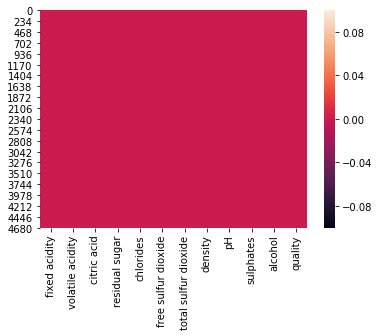

In [255]:
sns.heatmap(df.isnull()) ## shows that no data is missing

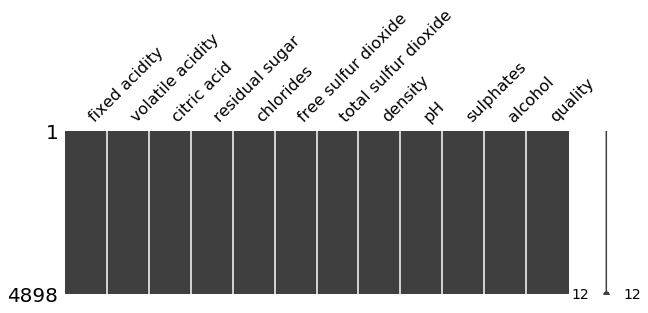

In [256]:
msno.matrix(df,figsize=(10,3))  ## another metohd to check missing data

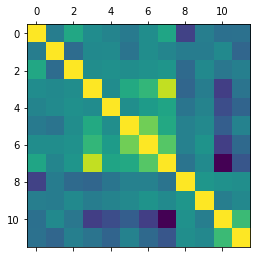

In [257]:
plt.matshow(df.corr())
plt.show()
## yellow shows high correlation and it is visible feature 3 and7 are highly correlated(0 indexing) 
## density and residual sugar
## so we need to remove this feature
## as it can lead to multicollinearity and degrade machine results

In [258]:
## seperate input and output

In [259]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [260]:
##splitting training and testing dataset

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [262]:
## scaling data to remove outliars

In [263]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [264]:
## training and prediction time kepping hyperparameters default
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
y_predict=rg.predict(x_test)    ## predictions of x_test

In [266]:
## evaluating and improving model

In [267]:
r2_score(y_test,y_predict)   ## quite low output

0.2901221946696406

In [268]:
## to improve our model we will use backward elimination


In [269]:
x=np.append(arr=np.ones((x.shape[0],1)) , values=x , axis=1)

In [270]:
import statsmodels.regression.linear_model as lm 
X = np.append(arr=np.ones((x.shape[0],1)),values=x,axis=1)
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_OLS = lm.OLS(endog = y, exog = X_opt).fit()


In [271]:
regressor_OLS.summary()   ## summary of data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:56:30   Log-Likelihood:                -5575.5
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.9285      4.317     32.880      0.000     133.466     150.391
x1           141.9285      4.317     32.880      0.000     133.466     150.391
x2             0.1663      0.017      9.940      0.000       0.134       0.199
x3            -1.6986      0.113    -15.082      0.000      -1.919      -1.478
x4             0.0941      0.096      0.980      0.327      -0.094       0.282
x5             0.1284      0.005     27.145      0.000       0.119       0.138
x6            -0.2864      0.550     -0.521      0.603      -1.365       0.792
x7             0.0031      0.001      3.624      0.000       0.001       0.005
x8            -0.0002      0.000     -0.422      0.673      -0.001       0.001
x9          -285.3888      8.875    -32.158      0.000    -302.787    -267.991
x10            1.1625      0.087     13.292      0.000       0.991       1.334
x11            0.8292      0.098      8.470      0.000       0.637       1.021
==============================================================================
Omnibus:                      220.369   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.160
Skew:                           0.171   Prob(JB):                    4.88e-141
Kurtosis:                       4.746   Cond. No.                     1.05e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [272]:
X_opt = X[:,[0,1,2,3,4,5,6,9,10,11]]
regressor_OLS = lm.OLS(endog = y, exog = X_opt).fit()

In [273]:
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:56:31   Log-Likelihood:                -5584.4
No. Observations:                4898   AIC:                         1.119e+04
Df Residuals:                    4889   BIC:                         1.125e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.3125      4.040     34.974      0.000     133.391     149.234
x1           141.3125      4.040     34.974      0.000     133.391     149.234
x2             0.1589      0.017      9.537      0.000       0.126       0.192
x3            -1.7602      0.110    -16.055      0.000      -1.975      -1.545
x4             0.1192      0.096      1.244      0.213      -0.069       0.307
x5             0.1304      0.005     27.980      0.000       0.121       0.140
x6            -0.1862      0.550     -0.338      0.735      -1.265       0.893
x7          -284.0234      8.319    -34.140      0.000    -300.333    -267.714
x8             1.1614      0.088     13.258      0.000       0.990       1.333
x9             0.8432      0.098      8.636      0.000       0.652       1.035
==============================================================================
Omnibus:                      193.054   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.558
Skew:                           0.162   Prob(JB):                    4.11e-113
Kurtosis:                       4.559   Cond. No.                     3.41e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [274]:
X_opt = X[:,[0,1,2,3,4,5,9,10,11]]
regressor_OLS = lm.OLS(endog = y, exog = X_opt).fit()

In [275]:
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     258.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:56:32   Log-Likelihood:                -5584.4
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4890   BIC:                         1.124e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.8587      3.704     38.302      0.000     134.598     149.120
x1           141.8587      3.704     38.302      0.000     134.598     149.120
x2             0.1602      0.016      9.875      0.000       0.128       0.192
x3            -1.7638      0.109    -16.169      0.000      -1.978      -1.550
x4             0.1156      0.095      1.215      0.225      -0.071       0.302
x5             0.1309      0.004     29.769      0.000       0.122       0.140
x6          -285.1610      7.609    -37.476      0.000    -300.078    -270.244
x7             1.1675      0.086     13.619      0.000       0.999       1.336
x8             0.8445      0.098      8.656      0.000       0.653       1.036
==============================================================================
Omnibus:                      194.238   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.573
Skew:                           0.163   Prob(JB):                    3.35e-114
Kurtosis:                       4.567   Cond. No.                     5.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [276]:
X_opt = X[:,[0,1,2,3,5,9,10,11]]
regressor_OLS = lm.OLS(endog = y, exog = X_opt).fit()

In [277]:
regressor_OLS.summary() ## we can stop as no p value >0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     300.9
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:56:33   Log-Likelihood:                -5585.2
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4891   BIC:                         1.123e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.7260      3.702     38.281      0.000     134.468     148.984
x1           141.7260      3.702     38.281      0.000     134.468     148.984
x2             0.1642      0.016     10.333      0.000       0.133       0.195
x3            -1.7842      0.108    -16.552      0.000      -1.996      -1.573
x4             0.1310      0.004     29.779      0.000       0.122       0.140
x5          -284.8612      7.605    -37.455      0.000    -299.771    -269.951
x6             1.1612      0.086     13.570      0.000       0.993       1.329
x7             0.8528      0.097      8.762      0.000       0.662       1.044
==============================================================================
Omnibus:                      194.620   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.584
Skew:                           0.162   Prob(JB):                    7.43e-115
Kurtosis:                       4.572   Cond. No.                     1.93e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [278]:
x=np.append(arr=np.ones((x.shape[0],1)) , values=x , axis=1)
X_opt = x[:,[0,1,2,3,5,9,10,11]]

In [279]:
x_train,x_test,y_train,y_test=train_test_split(X_opt,y,test_size=.2,random_state=1)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
rg=LinearRegression()
rg.fit(x_train,y_train)
y_predict=rg.predict(x_test) 

In [280]:
y_predict

array([5.26702244, 5.57116578, 6.06877544, 5.42514279, 6.45208103,
       5.37320291, 5.20284356, 5.23929435, 5.53158181, 5.85005113,
       6.47066773, 5.90004842, 6.20919311, 5.74777761, 6.28131775,
       5.81676709, 6.35658479, 5.57954827, 5.18372988, 6.25407882,
       6.06616923, 5.22524283, 6.62244564, 5.57504835, 5.79249942,
       5.88367739, 6.02010792, 5.92906112, 6.1625596 , 6.1263429 ,
       5.8848444 , 6.19621053, 6.14414527, 5.89373927, 6.6258881 ,
       5.62152482, 5.20356843, 5.71711942, 4.78936418, 6.34857671,
       6.02786236, 5.66698174, 6.0816721 , 5.73120939, 5.42129527,
       5.54150852, 5.57504835, 5.22783247, 5.68938054, 6.29032387,
       5.89627322, 6.05839774, 5.82661402, 5.70529976, 6.56953331,
       6.60546147, 6.20491731, 5.97418268, 5.96232848, 5.26906494,
       6.80101168, 6.08967543, 6.69768181, 5.71779744, 5.98839436,
       6.80859557, 5.47947837, 5.70146553, 6.33134403, 5.42021327,
       5.38836767, 5.59385746, 5.93897272, 5.60117263, 5.77690

In [281]:
  
round_off_values = np.around(y_predict)

In [282]:
## plot library

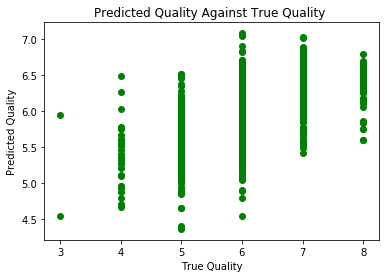

In [283]:
plt.scatter(y_test, y_predict, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()
